In [1]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wrangle as w

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
reload(w)
dfs = w.acquire_rpdr_data()
train, validate, test = w.split_queens(dfs)
ep_train = train.groupby(['season','episode']).first().iloc[:,10]



## Q1: How many challenges to winners win?

Text(0, 0.5, 'Avg. Outcomes')

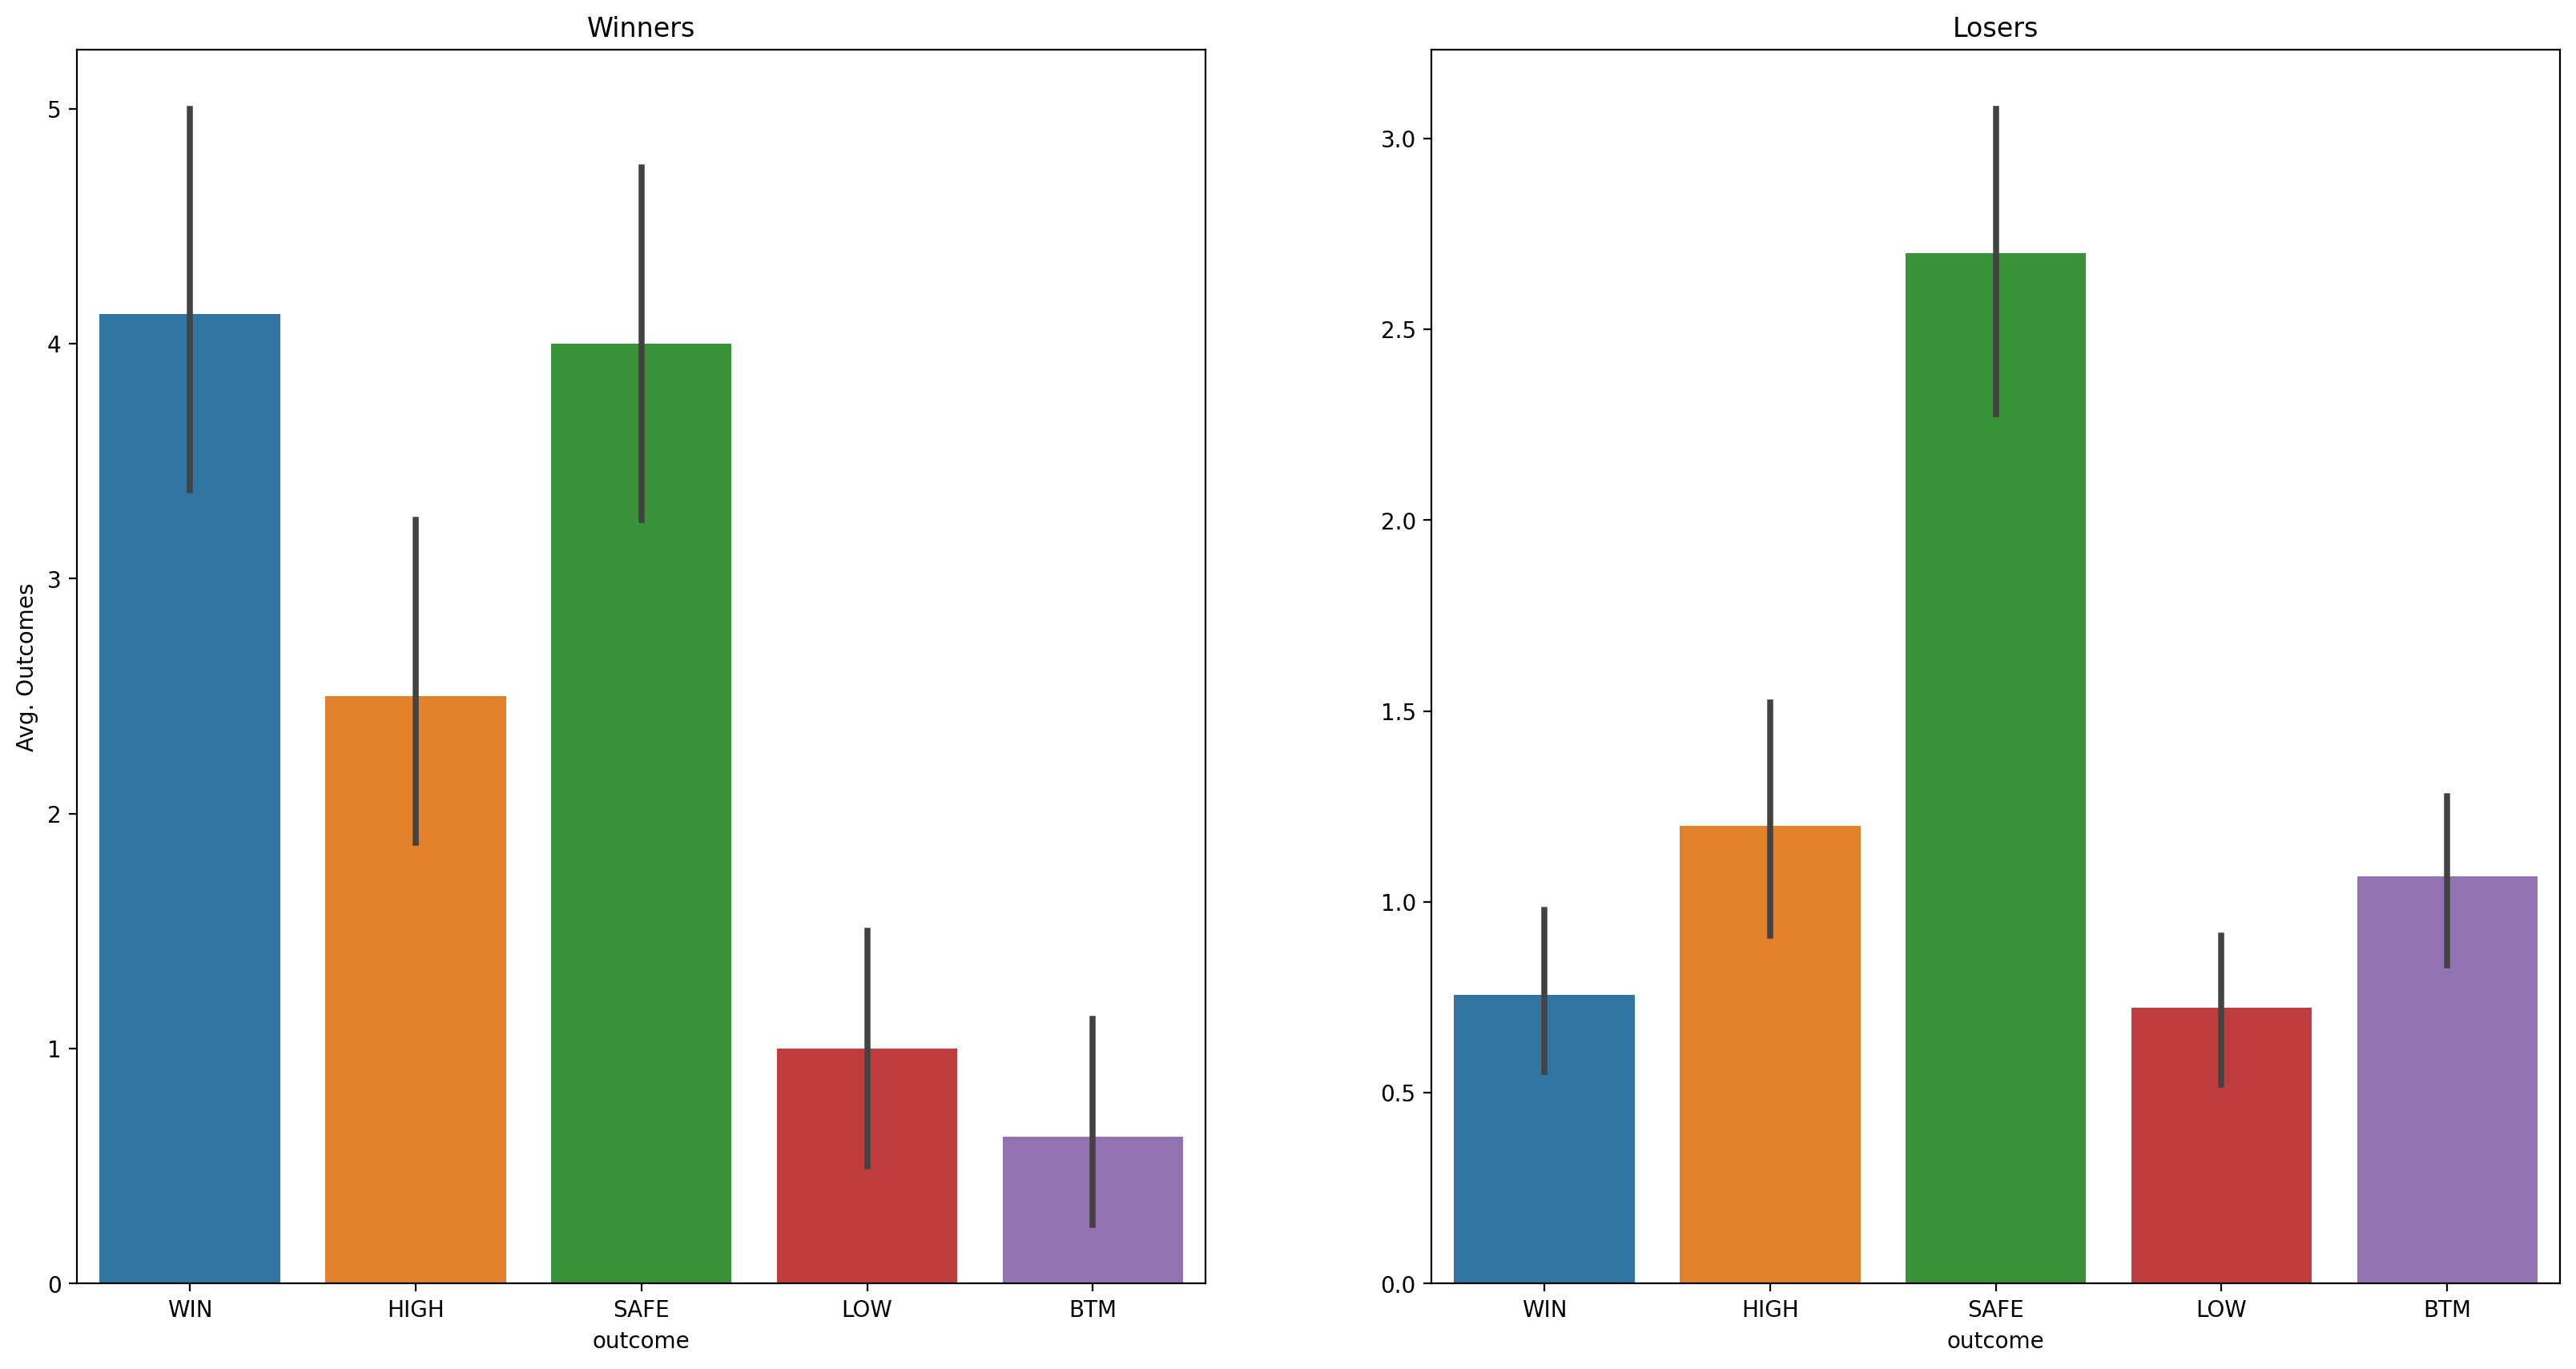

In [92]:
challenge_outcomes = train.groupby(['queen_name','outcome']).outcome.count().unstack(level='outcome',fill_value=0)
winners = train.groupby('queen_name').first()
winners = winners[winners.winner].index
winner_challenge_outcomes = challenge_outcomes[challenge_outcomes.index.isin(winners)][['WIN','HIGH','SAFE','LOW','BTM']]
loser_challenge_outcomes = challenge_outcomes[~challenge_outcomes.index.isin(winners)][['WIN','HIGH','SAFE','LOW','BTM']]
fig, axs = plt.subplots(1,2,figsize=(20,10))
sns.barplot(data=winner_challenge_outcomes,ax=axs[0])
sns.barplot(data=loser_challenge_outcomes,ax=axs[1])
axs[0].set_title('Winners')
axs[1].set_title('Losers')
axs[0].set_ylabel('Avg. Outcomes')

**Note:** Graphs are scaled proportionately, as queens who win inherently participate in more episodes than queens who do not.

### Takeaways:
 - Overall winners have proportionately more challenge wins than overal losers
 - Overall losers are more likely to be safe or in the bottom
